## Covid 19 Project

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


In [4]:
 df.tail()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1
2574,104,1,62,1,-1,1


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fever          2575 non-null   int64
 1   bodyPain       2575 non-null   int64
 2   age            2575 non-null   int64
 3   runnyNose      2575 non-null   int64
 4   diffBreath     2575 non-null   int64
 5   infectionProb  2575 non-null   int64
dtypes: int64(6)
memory usage: 120.8 KB


In [6]:
df['diffBreath'].value_counts()

 1    862
 0    857
-1    856
Name: diffBreath, dtype: int64

In [7]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,100.969709,0.492816,51.023301,0.502136,0.002330,0.493592
std,1.999771,0.500045,29.014442,0.500093,0.816969,0.500056
min,98.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.000000,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,101.000000,0.000000,50.000000,1.000000,0.000000,0.000000
75%,103.000000,1.000000,76.500000,1.000000,1.000000,1.000000
max,104.000000,1.000000,100.000000,1.000000,1.000000,1.000000


## Train and Test Start

In [8]:
import numpy as np

In [9]:
 def data_split(data, ratio):
        np.random.seed(42)
        shuffled = np.random.permutation(len(data))
        test_set_size = int(len(data) * ratio)
        test_indices = shuffled[:test_set_size]
        train_indices = shuffled[test_set_size:]
        return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
np.random.permutation(4)

array([0, 3, 1, 2])

In [11]:
train, test = data_split(df, 0.2)

In [12]:
train

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1703,103,0,21,1,-1,0
1675,103,0,76,1,-1,0
1518,103,1,44,0,1,1
361,100,0,81,0,-1,0
1544,99,1,53,1,1,0
...,...,...,...,...,...,...
1638,104,0,10,1,0,1
1095,100,0,80,0,1,1
1130,98,1,99,0,1,0
1294,98,0,93,0,-1,1


In [13]:
test

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1644,98,0,35,1,1,1
1189,104,0,20,0,-1,1
495,99,1,31,0,0,1
1656,99,0,97,1,1,0
651,103,0,28,1,0,1
...,...,...,...,...,...,...
1627,100,0,70,1,1,1
471,99,0,41,1,-1,1
700,101,1,89,0,0,0
25,98,1,15,0,-1,0


In [14]:
X_train = train[['fever', 'bodyPain', 'age', 'runnyNose', 'diffBreath']].to_numpy()
X_test = test[['fever', 'bodyPain', 'age', 'runnyNose', 'diffBreath']].to_numpy()

In [15]:
Y_train = train[['infectionProb']].to_numpy().reshape(2060,)
Y_test = test[['infectionProb']].to_numpy().reshape(515, )

In [16]:
  Y_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)


LogisticRegression()

In [19]:
inputFeatures = [104,1,64,1,1]
infprob = clf.predict_proba([inputFeatures])[0][1]

In [20]:
infprob

0.46067726292232714

array([[<AxesSubplot:xlabel='fever', ylabel='fever'>,
        <AxesSubplot:xlabel='bodyPain', ylabel='fever'>,
        <AxesSubplot:xlabel='age', ylabel='fever'>,
        <AxesSubplot:xlabel='runnyNose', ylabel='fever'>,
        <AxesSubplot:xlabel='diffBreath', ylabel='fever'>,
        <AxesSubplot:xlabel='infectionProb', ylabel='fever'>],
       [<AxesSubplot:xlabel='fever', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='bodyPain', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='age', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='runnyNose', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='diffBreath', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='infectionProb', ylabel='bodyPain'>],
       [<AxesSubplot:xlabel='fever', ylabel='age'>,
        <AxesSubplot:xlabel='bodyPain', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='runnyNose', ylabel='age'>,
        <AxesSubplot:xlabel='diffBreath', ylabel='age'>,
        <AxesSubplot:xlabe

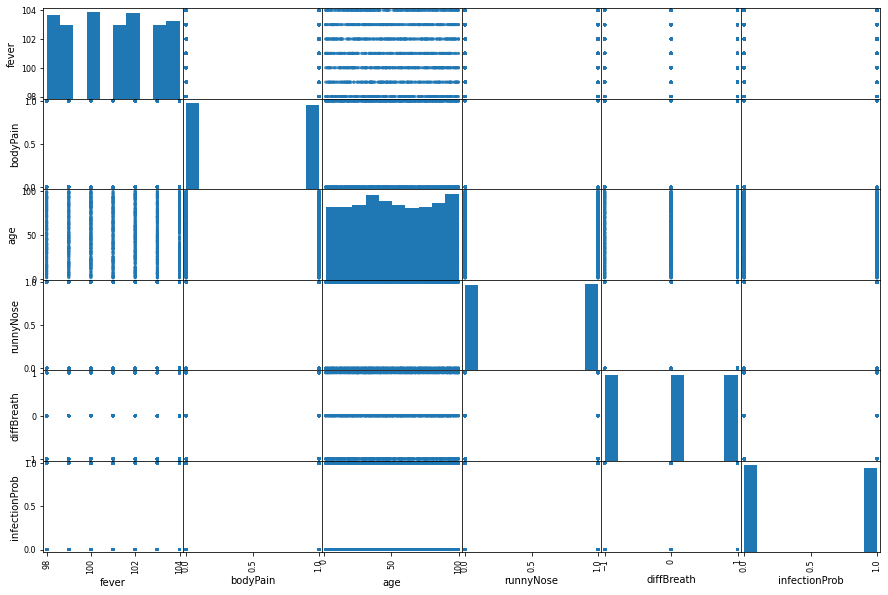

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["fever", "bodyPain", "age", "runnyNose","diffBreath","infectionProb"]
scatter_matrix(df[attributes], figsize = (15,10))

array([[<AxesSubplot:title={'center':'fever'}>,
        <AxesSubplot:title={'center':'bodyPain'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'runnyNose'}>],
       [<AxesSubplot:title={'center':'diffBreath'}>,
        <AxesSubplot:title={'center':'infectionProb'}>]], dtype=object)

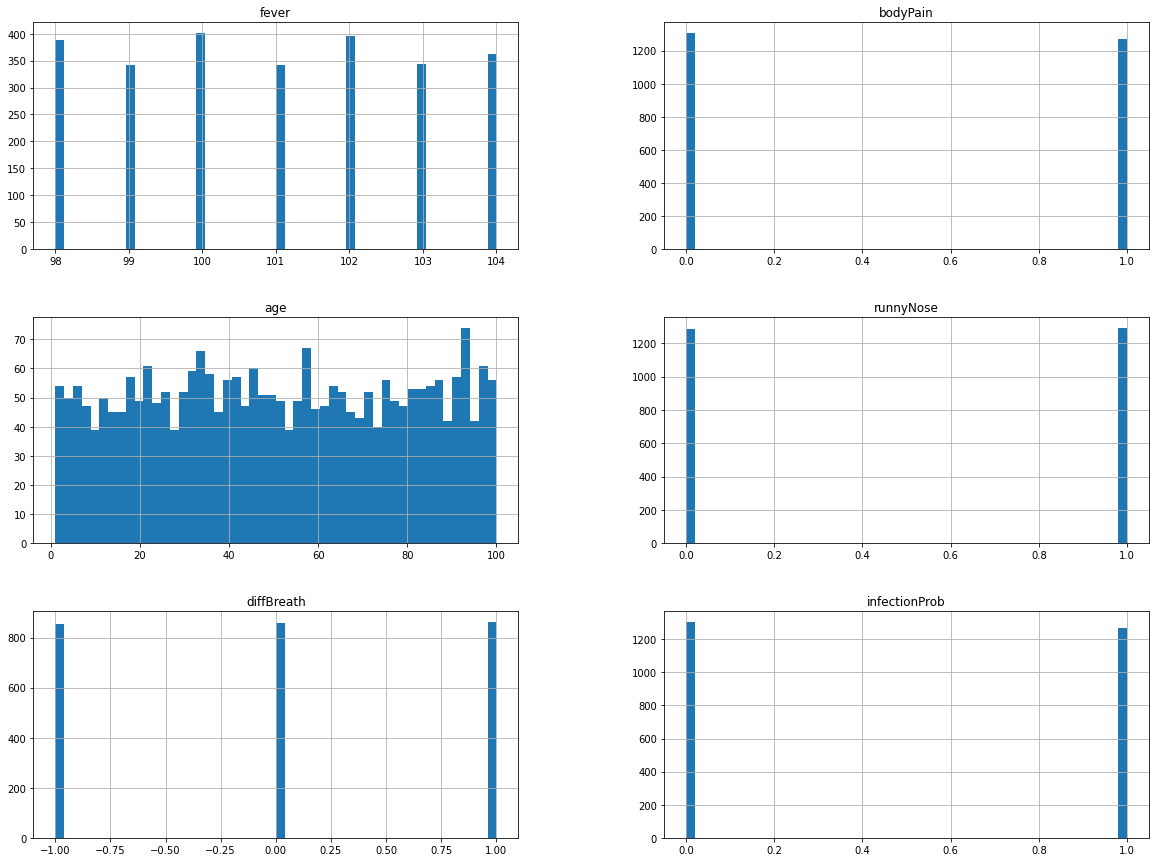

In [22]:
df.hist(bins=50, figsize=(20, 15))

<AxesSubplot:xlabel='age', ylabel='fever'>

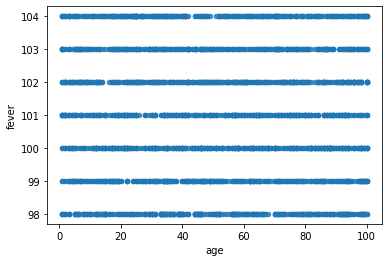

In [24]:
df.plot(kind="scatter", x="age", y="fever", alpha=0.8)

<AxesSubplot:xlabel='age', ylabel='bodyPain'>

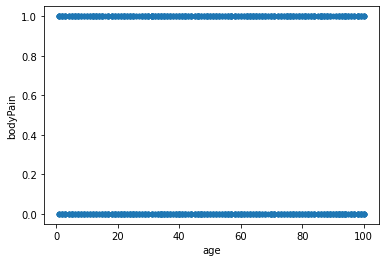

In [25]:
df.plot(kind="scatter", x="age", y="bodyPain", alpha=0.8)

<AxesSubplot:xlabel='age', ylabel='runnyNose'>

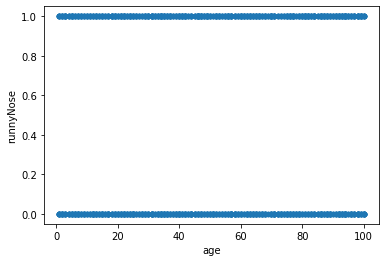

In [26]:
df.plot(kind="scatter", x="age", y="runnyNose", alpha=0.8)

<AxesSubplot:xlabel='age', ylabel='infectionProb'>

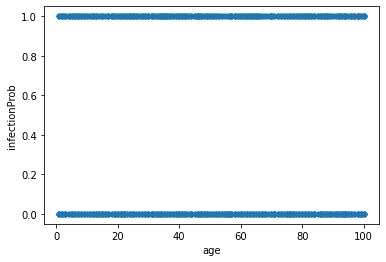

In [27]:
df.plot(kind="scatter", x="age", y="infectionProb", alpha=0.8)